In [1]:
import pandas as pd

from pathlib import Path

TURBINE_DATA = Path("../data/raw/scada_2020/Turbine_Data_Kelmarsh_1_2020-01-01_-_2021-01-01_228.csv")
TURBINE_STATUS = Path("../data/raw/scada_2020/Status_Kelmarsh_1_2020-01-01_-_2021-01-01_228.csv")

data = pd.read_csv(
    TURBINE_DATA,
    sep=",",
    encoding="utf-8",
    on_bad_lines="skip"
) 

data.head()

,# This file was exported by Greenbyte at 2022-01-27 22:53:20. Please see https://www.greenbyte.com for more information about Greenbyte.
0,#
1,# Turbine: Kelmarsh 1
2,# Turbine type: Senvion MM92
3,# Time zone: UTC
4,# Time interval: 2020-01-01 00:00:00 - 2021-01...


In [ ]:
status = pd.read_csv(
    TURBINE_STATUS,
    sep=",",
    encoding="utf-8",
    on_bad_lines="skip"
) 
status.head()

,# This file was exported by Greenbyte at 2022-01-27 23:29:26. Please see https://www.greenbyte.com for more information about Greenbyte.
0,#
1,# Turbine: Kelmarsh 1
2,# Turbine type: Senvion MM92 (Senvion MM92 kW)
3,# Time zone: UTC
4,# Time interval: 2020-01-01 00:00:00 - 2021-01...


In [23]:
import pandas as pd

data = pd.read_csv(
    TURBINE_DATA,
    skiprows=9,
    header=0,
    sep=",",
    encoding="utf-8",
    low_memory=False,
    on_bad_lines="skip"
)

data.columns = [c.lstrip("# ").strip() for c in data.columns]

info_data = pd.DataFrame({
    "column": data.columns,
    "dtype": data.dtypes.astype(str),
    "n_nulls": data.isna().sum(),
    "n_unique": [data[c].nunique(dropna=True) for c in data.columns]
}).reset_index(drop=True)

print(info_data)

                                       column    dtype  n_nulls  n_unique
0                               Date and time   object        0     52704
1                            Wind speed (m/s)  float64      468     52133
2        Wind speed, Standard deviation (m/s)  float64      722     51978
3                   Wind speed, Minimum (m/s)  float64      722     32526
4                   Wind speed, Maximum (m/s)  float64      722     34088
..                                        ...      ...      ...       ...
294     Drive train acceleration, Max (mm/ss)  float64     4396     48203
295     Drive train acceleration, Min (mm/ss)  float64     4396     48204
296  Drive train acceleration, StdDev (mm/ss)  float64     4396         7
297      Tower Acceleration X, StdDev (mm/ss)  float64     4383     48317
298      Tower Acceleration Y, StdDev (mm/ss)  float64     4383     48317

[299 rows x 4 columns]


In [9]:
# check missing values
na_count = data.isna().sum().sort_values(ascending=False)
na_pct = (na_count / len(data)) * 100
missing = pd.DataFrame({'missing_count': na_count, 'missing_%': na_pct})
display(missing.head(20))


,missing_count,missing_%
Potential power met mast anemometer MPC (kW),52704,100.000000
Lost Production (Contractual Global) (kWh),52704,100.000000
Potential power met mast anemometer (kW),52704,100.000000
Production-based Contractual Avail. (Global),52704,100.000000
Production-based Contractual Avail. (Custom),52704,100.000000
Time-based Contractual Avail. (Custom),52704,100.000000
Equivalent Full Load Hours counter (s),52704,100.000000
Lost Production (Contractual Custom) (kWh),52704,100.000000
Time-based Contractual Avail. (Global),52704,100.000000
Reactive Energy Export counter (kvarh),52631,99.861491


In [11]:
# get data info (skipping first rows which are metadata)
status = pd.read_csv(
    TURBINE_STATUS,
    sep=",",
    encoding="utf-8",
    skiprows=9,
    header=0,
    on_bad_lines="skip",
)

status.columns = [c.lstrip("# ").strip() for c in status.columns]

info_status = pd.DataFrame({
    "column": status.columns,
    "dtype": status.dtypes.astype(str),
    "n_nulls": status.isna().sum(),
    "n_unique": [status[c].nunique(dropna=True) for c in status.columns]
}).reset_index(drop=True)

print(info_status)

                      column    dtype  n_nulls  n_unique
0            Timestamp start   object        0      6553
1              Timestamp end   object        0      1193
2                   Duration   object        0       181
3                     Status   object        0         4
4                       Code    int64        0        65
5                    Message   object        0        65
6                    Comment  float64     8737         0
7  Service contract category   object     6430        12
8               IEC category   object       63         7


In [12]:
# check missing values
na_count = status.isna().sum().sort_values(ascending=False)
na_pct = (na_count / len(status)) * 100
missing = pd.DataFrame({'missing_count': na_count, 'missing_%': na_pct})
display(missing.head(20))


,missing_count,missing_%
Comment,8737,100.000000
Service contract category,6430,73.595056
IEC category,63,0.721071
Timestamp start,0,0.000000
Timestamp end,0,0.000000
Code,0,0.000000
Status,0,0.000000
Duration,0,0.000000
Message,0,0.000000


In [41]:
def categorize(col):
    c = col.lower()
    if "wind" in c: return "Wind"
    if "direction" in c or "vane" in c: return "Direction"
    if "power" in c or "energy" in c: return "Power/Energy"
    if "loss" in c or "avail" in c or "capacity" in c: return "Loss/Availability"
    if "temp" in c or "°c" in c: return "Temperature"
    if "volt" in c or "curr" in c or "freq" in c: return "Electrical"
    if "rpm" in c or "speed" in c: return "Speed/Rotation"
    if "pitch" in c or "yaw" in c or "blade" in c: return "Pitch/Yaw"
    if "accel" in c or "vibration" in c: return "Vibration"
    return "Other"

categories = pd.Series({col: categorize(col) for col in data.columns})
categories.value_counts()

Temperature          76
Other                54
Electrical           48
Power/Energy         41
Wind                 22
Pitch/Yaw            16
Loss/Availability    14
Speed/Rotation       12
Vibration            12
Direction             4
Name: count, dtype: int64

In [45]:
temp_cols = [c for c in data.columns if "temperature" in c.lower()]
print(f"{len(temp_cols)} temperature related columns:")
for c in temp_cols[:10]:
    print(" -", c)

68 temperature related columns:
 - Front bearing temperature (°C)
 - Rear bearing temperature (°C)
 - Stator temperature 1 (°C)
 - Nacelle ambient temperature (°C)
 - Nacelle temperature (°C)
 - Transformer temperature (°C)
 - Gear oil inlet temperature (°C)
 - Generator bearing rear temperature (°C)
 - Generator bearing front temperature (°C)
 - Gear oil temperature (°C)


In [4]:
# Convert to datetime and sort
data["Date and time"] = pd.to_datetime(data["Date and time"], utc=True)
data = data.sort_values("Date and time")

# exemplary extraction of temperature features
temp_features = [
    "Front bearing temperature (°C)",
    "Rear bearing temperature (°C)",
    "Stator temperature 1 (°C)",
    "Nacelle ambient temperature (°C)",
    "Nacelle temperature (°C)"
]
temps = data[["Date and time"] + temp_features].dropna()
print(f"Shape: {temps.shape}")

Shape: (51982, 6)


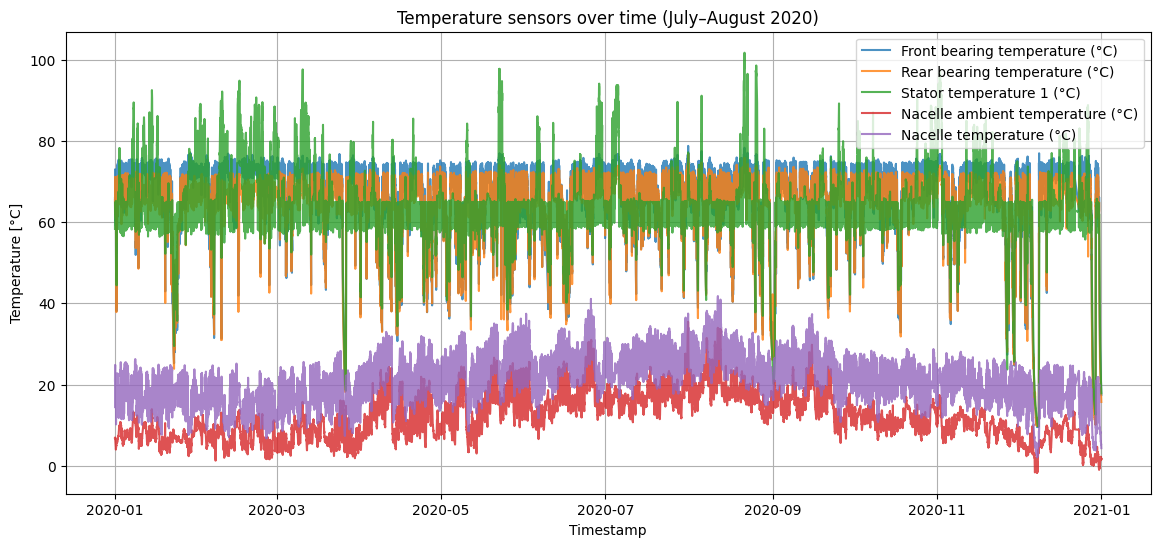

In [ ]:
import matplotlib.pyplot as plt

# visualize temperature features

subset = temps.set_index("Date and time")
plt.figure(figsize=(14,6))
for c in temp_features:
    plt.plot(subset.index, subset[c], label=c, alpha=0.8)
plt.title("Temperature sensors over time (July–August 2020)")
plt.xlabel("Timestamp")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# analyze time differences of timestamps
data["Date and time"] = pd.to_datetime(data["Date and time"], utc=True)
diffs = data["Date and time"].diff().dropna().dt.total_seconds()
print(diffs.describe())

# visualize small irregularities
diffs.value_counts().head(5)

count    52703.0
mean       600.0
std          0.0
min        600.0
25%        600.0
50%        600.0
75%        600.0
max        600.0
Name: Date and time, dtype: float64


Date and time
600.0    52703
Name: count, dtype: int64

In [25]:
duplicates = data["Date and time"].duplicated().sum()
print(f"Duplicate timestamps: {duplicates}")


Duplicate timestamps: 0


datetime64[ns, UTC]
2020-01-01 00:00:00+00:00 → 2020-12-31 23:50:00+00:00


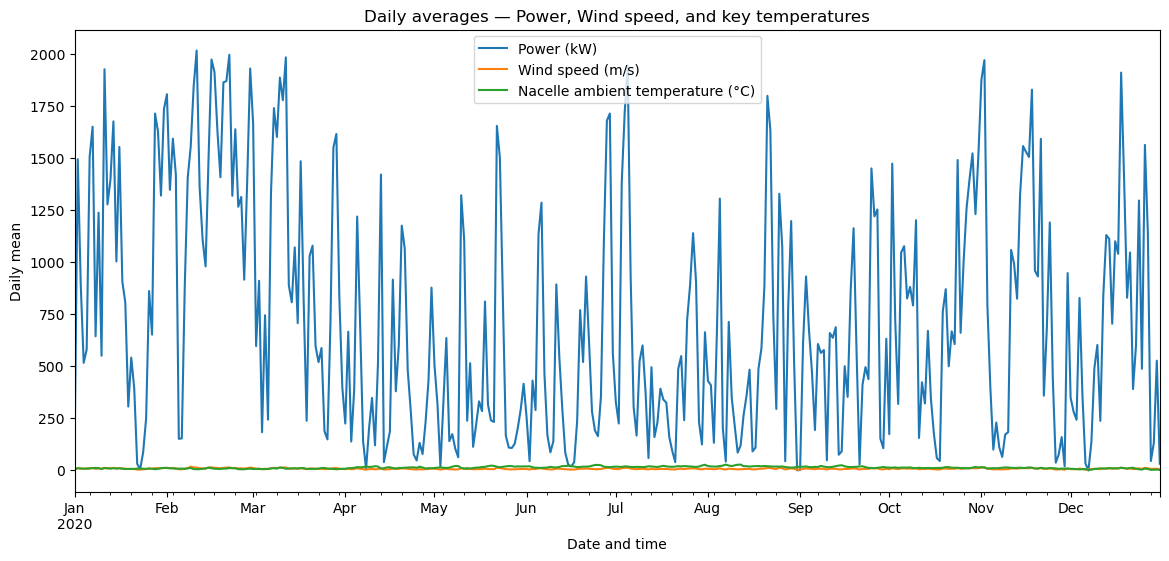

In [26]:
import matplotlib.pyplot as plt

# visualize daily averages of key features

cols = [
    "Power (kW)",
    "Wind speed (m/s)",
    "Nacelle ambient temperature (°C)"
]

# Ensure the datetime column is properly parsed and set as index
data["Date and time"] = pd.to_datetime(data["Date and time"], utc=True, errors="coerce")

# Drop any rows with invalid timestamps
data = data.dropna(subset=["Date and time"])

# Sort chronologically and set as index
data = data.sort_values("Date and time").set_index("Date and time")

print(data.index.dtype)
print(data.index.min(), "→", data.index.max())
data[cols].resample("D").mean().plot(figsize=(14,6))
plt.title("Daily averages — Power, Wind speed, and key temperatures")
plt.ylabel("Daily mean")
plt.show()


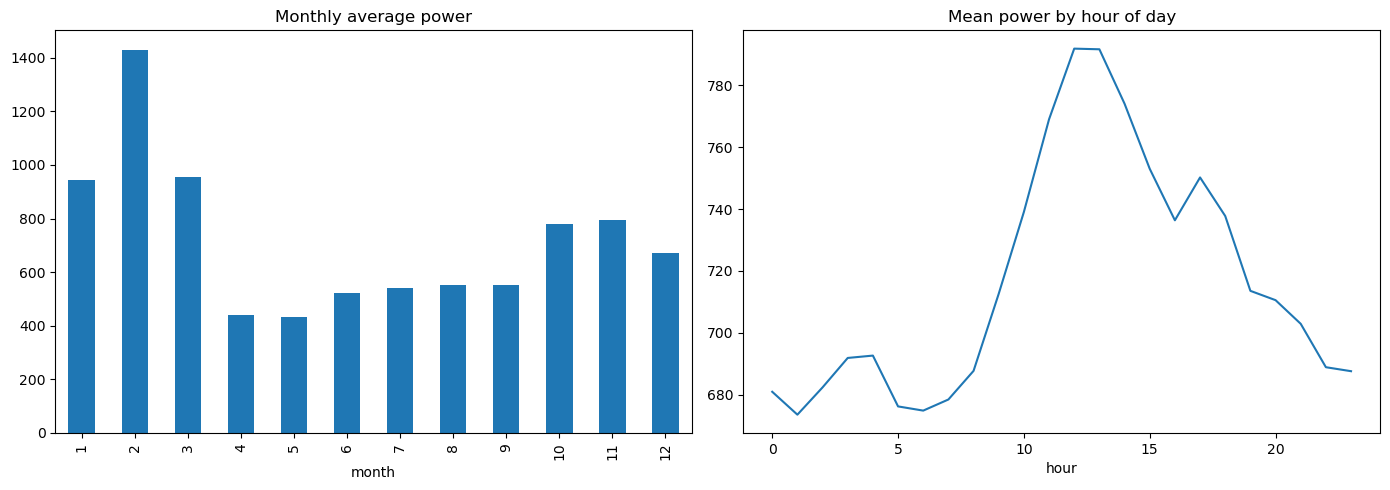

In [40]:
#
data.index = pd.to_datetime(data.index, utc=True)

data["month"] = data.index.month
data["hour"] = data.index.hour

fig, ax = plt.subplots(1, 2, figsize=(14,5))
data.groupby("month")["Power (kW)"].mean().plot(kind="bar", ax=ax[0], title="Monthly average power")
data.groupby("hour")["Power (kW)"].mean().plot(ax=ax[1], title="Mean power by hour of day")
plt.tight_layout()
plt.show()

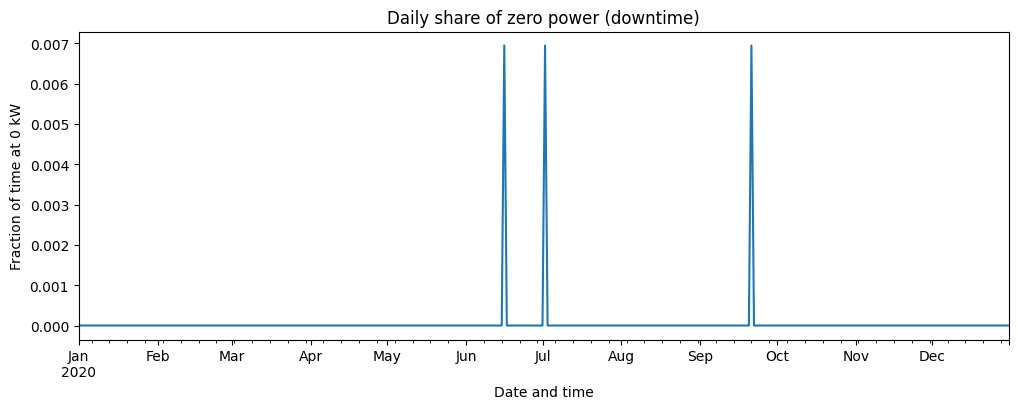

In [ ]:
# check for downtime --> outliers in power data
downtime = (data["Power (kW)"] == 0).resample("D").mean()
downtime.plot(figsize=(12,4), title="Daily share of zero power (downtime)")
plt.ylabel("Fraction of time at 0 kW")
plt.show()


In [ ]:
# find anomalies where power is low but wind speed is high
anomalies = data[
    (data["Wind speed (m/s)"] > 6) &
    (data["Power (kW)"] < 100)
]
print(f"{len(anomalies)} anomalous records detected")


258 anomalous records detected


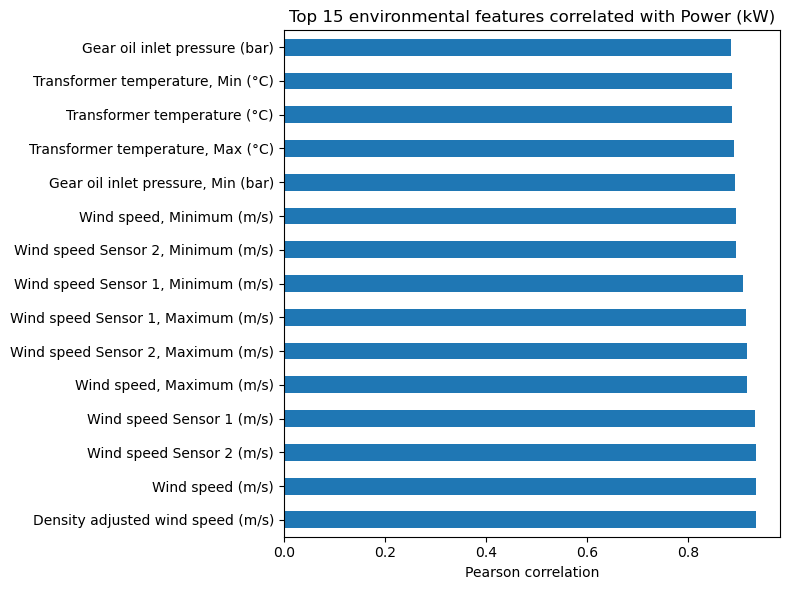

In [12]:
env_cols = [c for c in data.columns
            if any(k in c.lower() for k in ["wind", "temp", "pressure", "humid", "direction", "ambient"])]

# Top 15 environmental correlations with Power
env_corr = (
    data[env_cols + ["Power (kW)"]]
    .corr(numeric_only=True)["Power (kW)"]
    .drop("Power (kW)")
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(8,6))
env_corr.plot(kind="barh")
plt.title("Top 15 environmental features correlated with Power (kW)")
plt.xlabel("Pearson correlation")
plt.tight_layout()
plt.show()

In [14]:
# statistical overview of numerical features
num_cols = data.select_dtypes(include=["float64", "int64"]).columns

stats = data[num_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.95, 0.99]).T
stats["range"] = stats["max"] - stats["min"]
stats["iqr"] = stats["75%"] - stats["25%"]
display(stats.head(10))

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,range,iqr
Wind speed (m/s),52236.0,6.524402,3.011010,0.258319,1.301377,2.248134,4.313493,6.225888,8.311649,11.919605,14.927804,22.419562,22.161243,3.998157
"Wind speed, Standard deviation (m/s)",51982.0,0.964932,0.497087,0.000000,0.197073,0.341354,0.604298,0.881117,1.226774,1.870120,2.579193,5.559541,5.559541,0.622477
"Wind speed, Minimum (m/s)",51982.0,4.659358,2.361830,0.037126,0.357233,1.115269,2.922914,4.530055,6.101835,8.863656,10.879154,16.977695,16.940570,3.178921
"Wind speed, Maximum (m/s)",51982.0,8.340368,3.798761,0.487500,1.912501,3.075019,5.617817,7.822500,10.559041,15.290347,19.532334,32.929501,32.442000,4.941223
Long Term Wind (m/s),52704.0,6.132240,0.675291,5.200000,5.200000,5.200000,5.400000,6.050000,6.700000,7.100000,7.100000,7.100000,1.900000,1.300000
Wind speed Sensor 1 (m/s),52154.0,6.969234,3.176265,0.000000,0.947476,2.289726,4.695175,6.687072,8.911998,12.570717,15.493995,23.833506,23.833506,4.216823
"Wind speed Sensor 1, Standard deviation (m/s)",51900.0,0.904163,0.460634,0.000000,0.179608,0.299228,0.570155,0.839953,1.157208,1.723047,2.330060,4.967301,4.967301,0.587052
"Wind speed Sensor 1, Minimum (m/s)",51492.0,5.299868,2.570444,0.000000,0.000000,1.423732,3.459061,5.158684,6.847391,9.928230,11.876861,19.129086,19.129086,3.388330
"Wind speed Sensor 1, Maximum (m/s)",51900.0,8.682265,3.877807,0.000000,1.851906,3.158050,5.911967,8.219324,11.026901,15.659343,19.732822,32.514721,32.514721,5.114934
Wind speed Sensor 2 (m/s),52236.0,6.524897,3.011037,0.275138,1.300505,2.240381,4.310085,6.230436,8.316810,11.912305,14.992078,22.729181,22.454044,4.006725


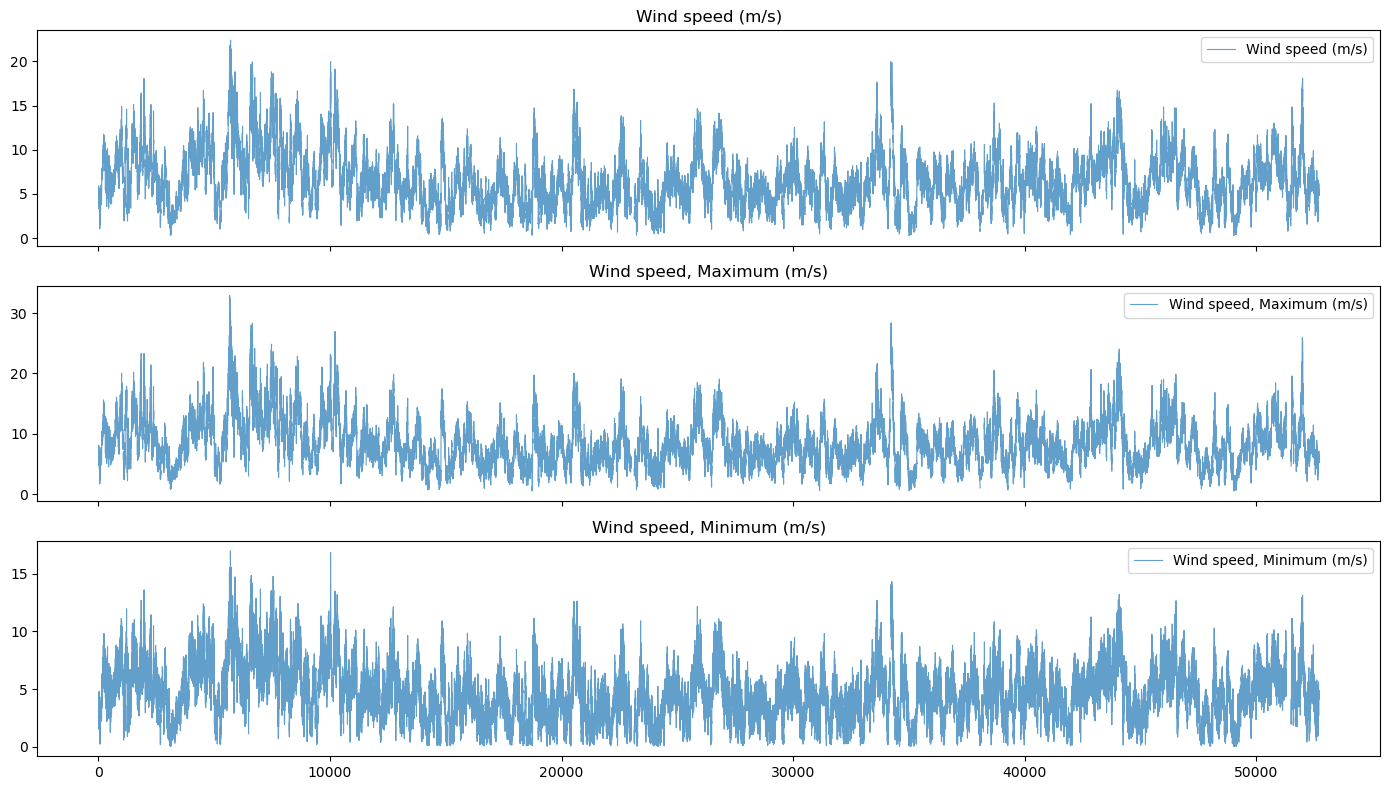

In [15]:
sample_cols = ["Wind speed (m/s)", "Wind speed, Maximum (m/s)", "Wind speed, Minimum (m/s)"]

fig, axes = plt.subplots(len(sample_cols), 1, figsize=(14, 8), sharex=True)
for i, col in enumerate(sample_cols):
    data.plot(y=col, ax=axes[i], lw=0.8, alpha=0.7, title=col)
plt.tight_layout()
plt.show()

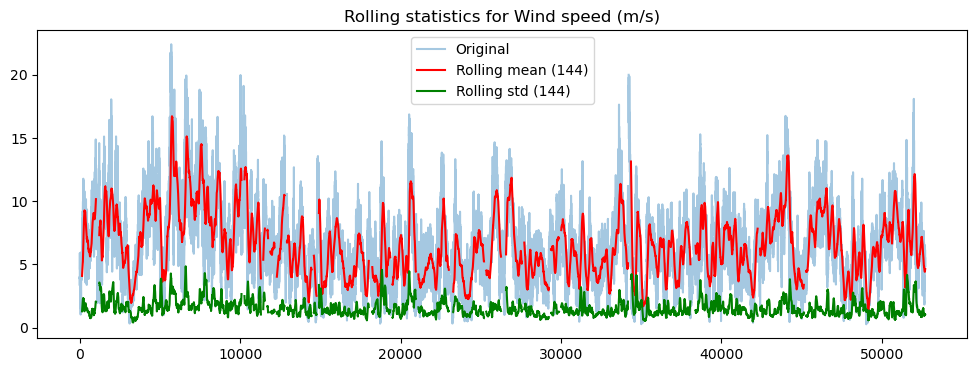

In [ ]:
col = "Wind speed (m/s)"
window = 144  # 1 day (assuming 10-minute intervals)

rolling_mean = data[col].rolling(window=window).mean()
rolling_std  = data[col].rolling(window=window).std()

plt.figure(figsize=(12,4))
plt.plot(data.index, data[col], alpha=0.4, label="Original")
plt.plot(data.index, rolling_mean, color="red", label=f"Rolling mean ({window})")
plt.plot(data.index, rolling_std,  color="green", label=f"Rolling std ({window})")
plt.legend()
plt.title(f"Rolling statistics for {col}")
plt.show()


In [30]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

results = []

num_cols = data.select_dtypes(include=["float64"]).columns
window = 144  # 1 day (assuming 10-minute intervals)

for col in num_cols:
    series = data[col].dropna()
    if len(series) < window * 2:
        continue  # too short for analysis

    # --- Rolling-Trend-Index ---
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    # Trend-Score: Variance of rolling mean
    trend_strength = np.var(rolling_mean.dropna()) / np.var(series)

    # --- Seasonality-Index (via Decomposition) ---
    try:
        decomp = seasonal_decompose(series, period=window, model='additive', extrapolate_trend='freq')
        seasonal_strength = 1 - (np.var(decomp.resid.dropna()) / np.var(series))
    except Exception:
        seasonal_strength = np.nan

    results.append({
        "column": col,
        "trend_strength": trend_strength,
        "seasonal_strength": seasonal_strength
    })

trend_df = pd.DataFrame(results).dropna().sort_values("trend_strength", ascending=False)
display(trend_df.head(15))


/tmp/ipykernel_3725/3580455926.py:19: RuntimeWarning: invalid value encountered in scalar divide
  trend_strength = np.var(rolling_mean.dropna()) / np.var(series)
/tmp/ipykernel_3725/3580455926.py:24: RuntimeWarning: invalid value encountered in scalar divide
  seasonal_strength = 1 - (np.var(decomp.resid.dropna()) / np.var(series))


,column,trend_strength,seasonal_strength
4,Long Term Wind (m/s),0.995814,0.999076
38,Energy Budget - Default (kWh),0.995051,0.999069
268,Metal particle count counter,0.992790,0.999805
231,Reactive Energy Import counter (kvarh),0.992213,1.000000
27,Energy Export counter (kWh),0.991768,0.999999
267,Cable windings from calibration point,0.943367,0.973685
270,"Cable windings from calibration point, Min",0.941380,0.972629
269,"Cable windings from calibration point, Max",0.941208,0.972691
95,Hub temperature (°C),0.938607,0.967607
122,"Hub temperature, max (°C)",0.937747,0.966377


In [33]:
trend_df.loc[trend_df["column"] == "Power (kW)"]


,column,trend_strength,seasonal_strength
58,Power (kW),0.680761,0.765009
